In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
def get_black_pixels(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    black_pixels = np.argwhere(gray == 0)
    return black_pixels

def calculate_angle(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cross_product = np.cross(v1, v2)
    cos_theta = dot_product / (norm_v1 * norm_v2)
    angle = np.arccos(cos_theta)
    # if cross_product < 0:
    #     angle = angle * (-1)
    return angle

# Algorithm Flowchart

1. Load the template image.
2. Extract the coordinates of black pixels from the template image.
3. Perform PCA (Principal Component Analysis) on the coordinates to find the first eigen vector (reference line).
4. Load the input image and extract the coordinates of black pixels from the input image.
5. Perform PCA on the input image coordinates to obtain the corresponding eigen vector.
6. Calculate the angle between the reference vector and the input vector. Rotate the input image by the calculated angle to align the vectors. Save or use the aligned image.
7. Repeat steps 4 to 9 for all images in the KIMIA Dataset.

In [27]:
dataset_folder = "KIMIA dataset"
images = []
for filename in os.listdir(dataset_folder):
    if filename.endswith(".png"):
        image = cv2.imread(os.path.join(dataset_folder, filename))
        images.append(image)

In [28]:
template_index = 0
template_image = images[template_index]

template_pixels = get_black_pixels(template_image)

pca = PCA(n_components=2)
pca.fit(template_pixels)
principal_components = pca.components_
aligned_folder = "Aligned-Images"
os.makedirs(aligned_folder, exist_ok=True)

In [29]:
for idx, image in enumerate(images):
    if idx == template_index:
        aligned_image = image 
    else:
        image_pixels = get_black_pixels(image)
        pca = PCA(n_components=2)
        pca.fit(image_pixels)
        angle = calculate_angle(principal_components[0], pca.components_[0])

        rows, cols, _ = image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), np.degrees(angle), 1)
        aligned_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    subfolder = os.path.join(aligned_folder, str(idx+1))
    os.makedirs(subfolder, exist_ok=True)
    cv2.imwrite(os.path.join(subfolder, f"aligned_image_{idx}.jpg"), aligned_image)
    cv2.imwrite(os.path.join(subfolder, f"original_image_{idx}.jpg"), image)

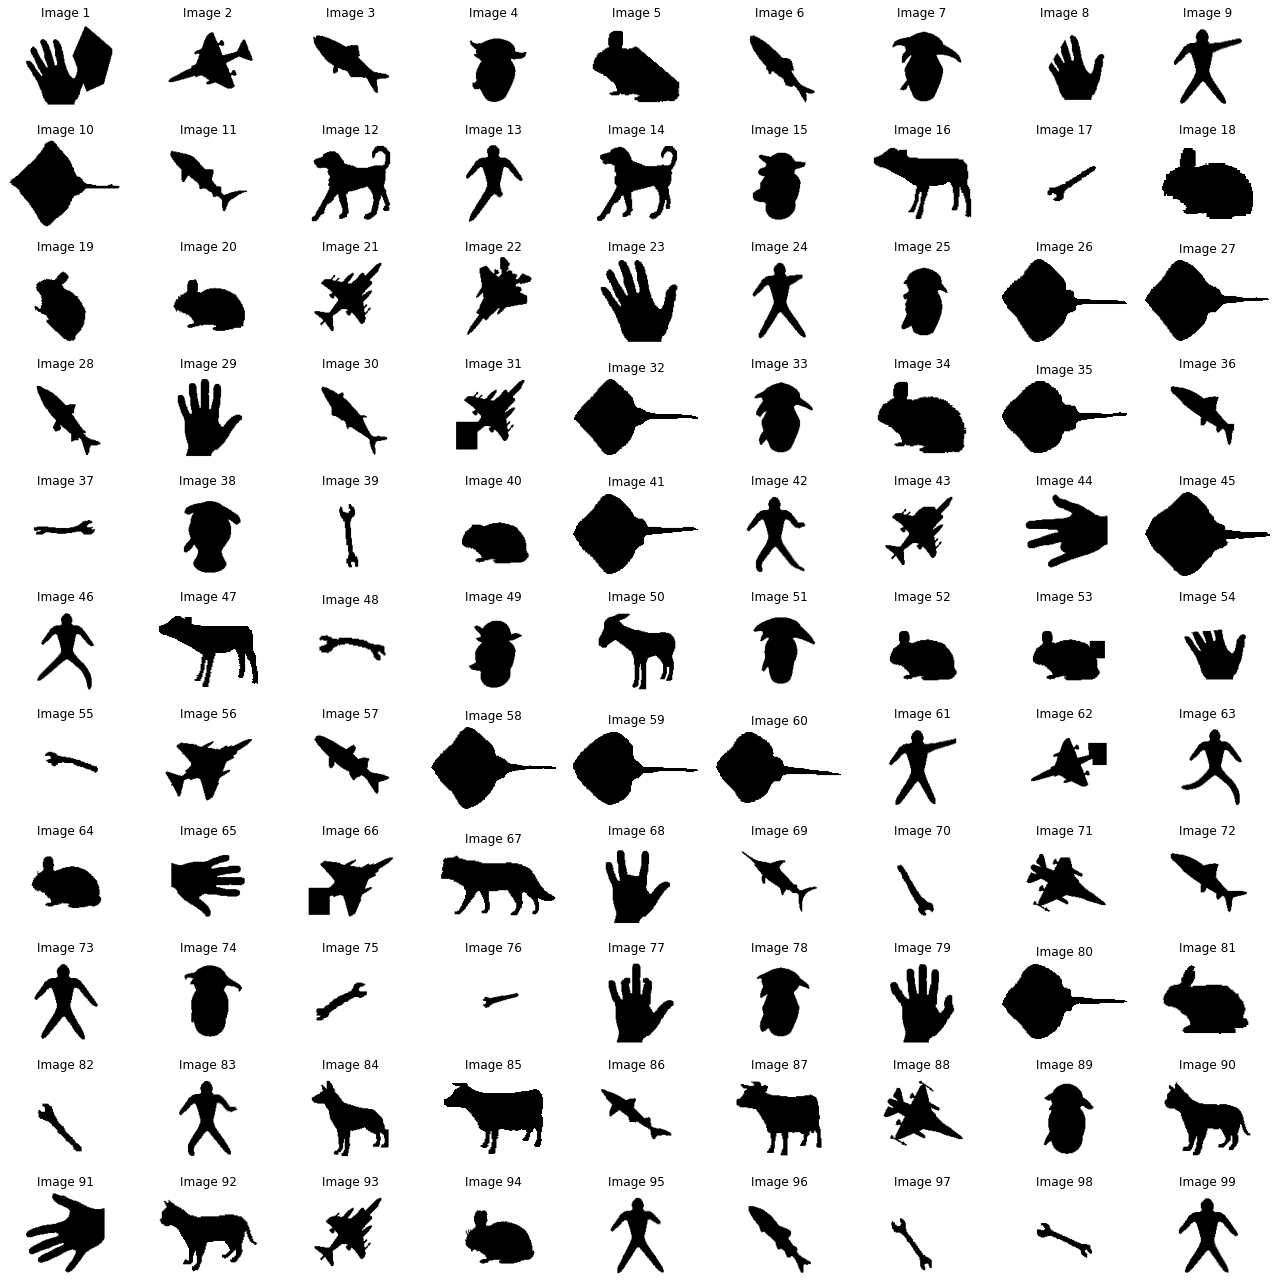

In [30]:
cv2.imwrite(os.path.join(aligned_folder, f"template_image.jpg"), template_image)

fig, axes = plt.subplots(11, 9, figsize=(18, 18))
axes = axes.flatten()
for i in range(len(images)):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f"Image {i + 1}")

plt.tight_layout()
plt.show()